## Equipo: Los patrones
  - Luis Mario Escobar Rosales 420003818
  - Samantha Mora Abonce  317010945
  - Angel Castro Reyes 317251625
  - Gabriela Cruz Blanco 317032268

## Método de la Bisección

Implementar en Python el método de la bisección para encontrar el cero de la función $f(x) = x^{3} − x − 1$ en el intervalo $[1, 2]$. Utilicen una precisión de $1 × 10^{−6}$ y un máximo
de 50 iteraciones.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, Union #Meramente para dar mas legibilidad a los parametros de las funciones

In [ ]:
# Definimos el polinomio como una función convencional
POLINOMIO = lambda x: x**3 - x - 1

'''Función que toma una función como argumento y la evalúa en un punto dado, el proposito de este metodo es tener mas libertad para pasar otras funciones
que quiza no puedan ser modeladas con lambdas'''
def evaluar_funcion(funcion: Callable[[Union[int, float]], Union[int, float]] , punto: Union[int, float]) -> Union[int, float]:
    return funcion(punto)


#Funcion que calcula el punto medio del intervalo

def punto_medio(a:float,b:float)->float:
  return (a+b)/2


In [ ]:
def biseccion(a:float,b:float,precision:float,iteraciones_maximas:int,polinomio:Callable[[Union[int, float]], Union[int, float]])->list:

  res= []

  if evaluar_funcion(polinomio,a) * evaluar_funcion(polinomio,b) > 0:
        raise ValueError('No existe raíz en el intervalo dado')

  #print("Hola")
  fila = 0
  raiz  = False

  while iteraciones_maximas :
    #print("Iteracion: ", iteraciones_maximas)

    fa = evaluar_funcion(polinomio,a)
    fb = evaluar_funcion(polinomio,b)

    punto_Medio_C =  punto_medio(a,b)


    fc = evaluar_funcion(polinomio,punto_Medio_C)
    #print(fc)


    if np.abs(fc) < precision:

      res.append({'a': a, 'b': b, 'c': punto_Medio_C, 'f(a)': fa, 'f(b)': fb, 'f(c)': fc, 'raiz': "VERDADERO"})
      return   punto_Medio_C,pd.DataFrame(res)

    if fa * fc < 0:
          #print("Probando")
          b = punto_Medio_C
    else:
          #print("Probando2")
          a = punto_Medio_C
    res.append({'a': a, 'b': b, 'c': punto_Medio_C, 'f(a)': fa, 'f(b)': fb, 'f(c)': fc, 'raiz': "FALSO"})

    iteraciones_maximas-=1

  return None,pd.DataFrame(res)

In [ ]:
precision = 1e-6
r,d = biseccion(1,2,precision,50,POLINOMIO)
pd.options.display.float_format = '{:.7f}'.format #Ajustamos los decimales para que se visualicen mejor los datos
print("Resultado: ",r,"\n")
print("Tabla de ejecuciones")
print(d)

Resultado:  1.3247179985046387 

Tabla de ejecuciones
           a         b         c       f(a)      f(b)       f(c)       raiz
0  1.0000000 1.5000000 1.5000000 -1.0000000 5.0000000  0.8750000      FALSO
1  1.2500000 1.5000000 1.2500000 -1.0000000 0.8750000 -0.2968750      FALSO
2  1.2500000 1.3750000 1.3750000 -0.2968750 0.8750000  0.2246094      FALSO
3  1.3125000 1.3750000 1.3125000 -0.2968750 0.2246094 -0.0515137      FALSO
4  1.3125000 1.3437500 1.3437500 -0.0515137 0.2246094  0.0826111      FALSO
5  1.3125000 1.3281250 1.3281250 -0.0515137 0.0826111  0.0145760      FALSO
6  1.3203125 1.3281250 1.3203125 -0.0515137 0.0145760 -0.0187106      FALSO
7  1.3242188 1.3281250 1.3242188 -0.0187106 0.0145760 -0.0021279      FALSO
8  1.3242188 1.3261719 1.3261719 -0.0021279 0.0145760  0.0062088      FALSO
9  1.3242188 1.3251953 1.3251953 -0.0021279 0.0062088  0.0020367      FALSO
10 1.3247070 1.3251953 1.3247070 -0.0021279 0.0020367 -0.0000466      FALSO
11 1.3247070 1.3249512 1.3249512 -

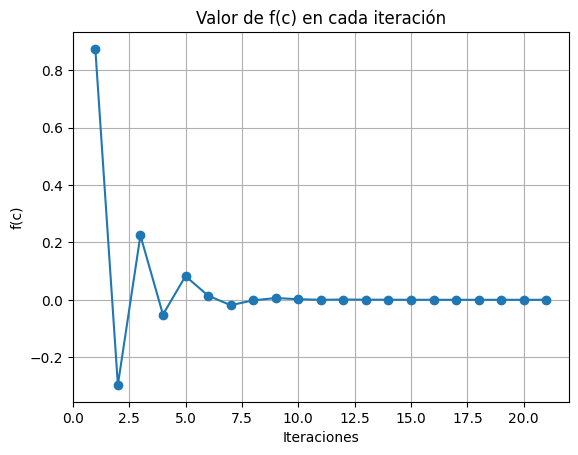

In [ ]:
_,df_resultados = biseccion(1,2,precision,50,POLINOMIO)

# Graficar f(c) con respecto a las iteraciones
plt.plot(range(1, len(df_resultados)+1), df_resultados['f(c)'], marker='o', linestyle='-')
plt.xlabel('Iteraciones')
plt.ylabel('f(c)')
plt.title('Valor de f(c) en cada iteración')
plt.grid(True)
plt.show()

In [ ]:
#Extra : Metodo Recursivo
def biseccion_recursivo(polinomio:Callable[[Union[int, float]], Union[int, float]], a: Union[int, float], b: Union[int, float], tol:float)->float:

    if evaluar_funcion(polinomio,a) * evaluar_funcion(polinomio,b) > 0:
        raise ValueError('No existe raíz en el intervalo dado')

    punto_medio = (a + b)/2

    if np.abs(polinomio(punto_medio)) < tol:

        return punto_medio

    elif polinomio(a) * polinomio(punto_medio) < 0:
        return biseccion_recursivo(polinomio, a, punto_medio, tol)

    else:
        return biseccion_recursivo(polinomio, punto_medio, b, tol)


precision = 1e-6
m = biseccion_recursivo(POLINOMIO,1,2,precision)
print("Resultado metodo iterativo: ",m)

Resultado metodo iterativo:  1.3247179985046387
